In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import sklearn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score


from sklearn.svm import SVC


<div style="background-color: #20B2AA; padding: 10px; color: black; font-family: 'Times New Roman', serif;">
  <h1>Exploratory Data Analysis (EDA)</h1>
  <p></p>
</div>


<div style="background-color: #20B2AA; padding: 20px; color: black; font-family: 'Times New Roman', serif;">
  <h2 style="margin-bottom: 20px;"></h2>
  <p style="margin-bottom: 10px;">We will be doing a deep dive into our data set to get as many insights as possible.</p>
  <p style="margin-bottom: 10px;">Some things to keep an eye out for are:</p>
  <ul style="list-style-type: disc; margin-left: 5px;">
    <li>Missing or messy data</li>
    <li>Statistical distributions</li>
    <li>Outliers</li>
    <li>Class imbalance</li>
    <li>Data range (might need to normalize the data)</li>
    <li>Duplicates</li>
  </ul>
</div>


</div>


In [10]:
# loading in the data

data_dictionary = pd.read_csv('Data Dictionary.csv')
df = pd.read_csv('Dataset.csv')


In [4]:
data_dictionary.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


In [6]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [7]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [9]:
df.shape

(91713, 186)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [14]:
# for i in df.columns:
#     print(f"Unique value in {i}:")
#     print(df[i].unique(),'\n')

Unique value in encounter_id:
[ 66154 114252 119783 ...   8981  33776   1671] 

Unique value in patient_id:
[ 25312  59342  50777 ...  58179 120598  53612] 

Unique value in hospital_id:
[118  81  33  83  77 149  31 151  69  46  63 113 137  89 168 150 140  34
  74 102  91 198 129   4 124  68 138 174 134 169  57 177 155  85  78  95
  98 105  76   5 116 119  79 171 161 128 147 112  32  55  17 136  44 179
  88  23 130  72 109  10 204 117 202  70 160  62  16 199  54 100 186  20
 107  14 132  87  53  21  99  71 182  24 200 189  60  84  26 133  27   8
 194 111 176 187  39 101  80  90  19  94  50 192  43 145 180  40   9  93
 185 159 166 157  64 125  92  13  37 139 135  51  18 181 158 196  47 103
 197  38 188   2  49 142  35  15 146  29  36 167  30 184 104 121 195   3
   6 183  66] 

Unique value in hospital_death:
[0 1] 

Unique value in age:
[68. 77. 25. 81. 19. 67. 59. 70. 45. 50. 72. 80. 48. 65. 78. 30. 46. 39.
 79. 58. 87. 60. 85. nan 76. 53. 71. 82. 52. 75. 64. 55. 73. 88. 84. 62.
 56. 3

In [24]:
# there's a lot of data so let's try to quantify 

pd.set_option('display.max_rows', None)
data_overview = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
})

data_overview.sort_values('Unique Values', ascending= False)


    

,Data Type,Unique Values
encounter_id,int64,91713
patient_id,int64,91713
bmi,float64,34888
urineoutput_apache,float64,24772
pre_icu_los_days,float64,9757
d1_pao2fio2ratio_max,float64,5194
d1_pao2fio2ratio_min,float64,4990
weight,float64,3409
h1_pao2fio2ratio_max,float64,3142
h1_pao2fio2ratio_min,float64,3122


In [22]:
# resetting how many rows can be displayed by a dataframe 
pd.reset_option('display.max_rows')

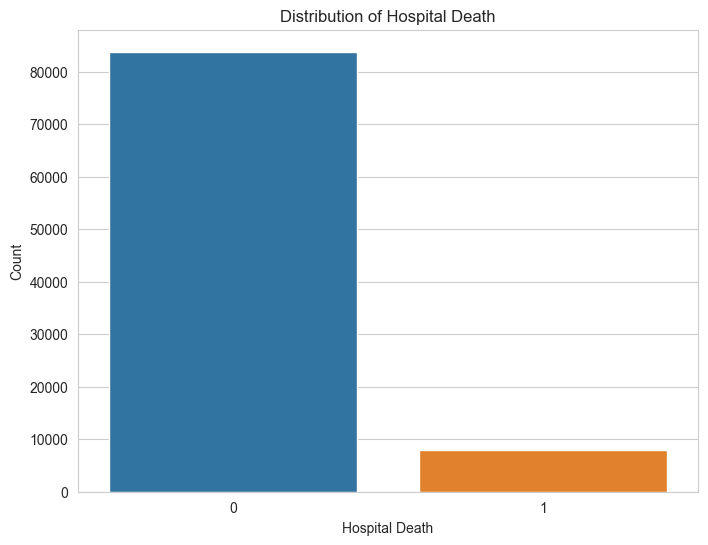

In [25]:
# let's see the distribution of the target class 
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'hospital_death'
plt.figure(figsize=(8, 6))
sns.countplot(x='hospital_death', data=dataset)
plt.title('Distribution of Hospital Death')
plt.xlabel('Hospital Death')
plt.ylabel('Count')
plt.show()

<div style="background-color: #20B2AA; padding: 20px; color: black; font-family: 'Times New Roman', serif;">
  <h3 style="margin-bottom: 20px;">Initial Thoughts</h3>
  <ul style="list-style-type: disc; margin-left: 10px;">
    <li>There's a lot of data: 186 columns and more than 90k rows.</li>
    <li>Each column has distinct values varying from 1 to almost 35k.</li>
    <li>Most of the data seems to be numerical in nature and not much categorical.</li>
    <li>The data dictionary contains metadata about each variable, such as its category, unit of measure, data type, description, and example.</li>
  </ul>
</div>


<div style="background-color: #20B2AA; padding: 20px; color: black; font-family: 'Times New Roman', serif;">
  <h4 style="margin-bottom: 20px;">Duplicates and missing data</h4>
  <ul style="list-style-type: disc; margin-left: 10px;">
    
  </ul>
</div>

In [26]:
# there seem to be no duplicates
df.duplicated().sum()

0

In [33]:
# missing data overview

data_overview = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
})

data_overview.sort_values(by='Missing %', ascending=False).head(186)

,Data Type,Missing Values,Missing %
h1_bilirubin_min,float64,84619,92.265001
h1_bilirubin_max,float64,84619,92.265001
h1_lactate_max,float64,84369,91.992411
h1_lactate_min,float64,84369,91.992411
h1_albumin_max,float64,83824,91.398166
h1_albumin_min,float64,83824,91.398166
h1_pao2fio2ratio_min,float64,80195,87.441257
h1_pao2fio2ratio_max,float64,80195,87.441257
h1_arterial_ph_max,float64,76424,83.329517
h1_arterial_ph_min,float64,76424,83.329517


<div style="background-color: #20B2AA; padding: 20px; color: black; font-family: 'Times New Roman', serif;">
  <h3 style="margin-bottom: 20px;"></h3>
  <ul style="list-style-type: disc; margin-left: 10px;">
    <li>Almost every single column has missing data.</li>
    <li>We'll need to figure out which columns should be imputed and which ones would not be usable</li>
  </ul>
</div>


<AxesSubplot: >

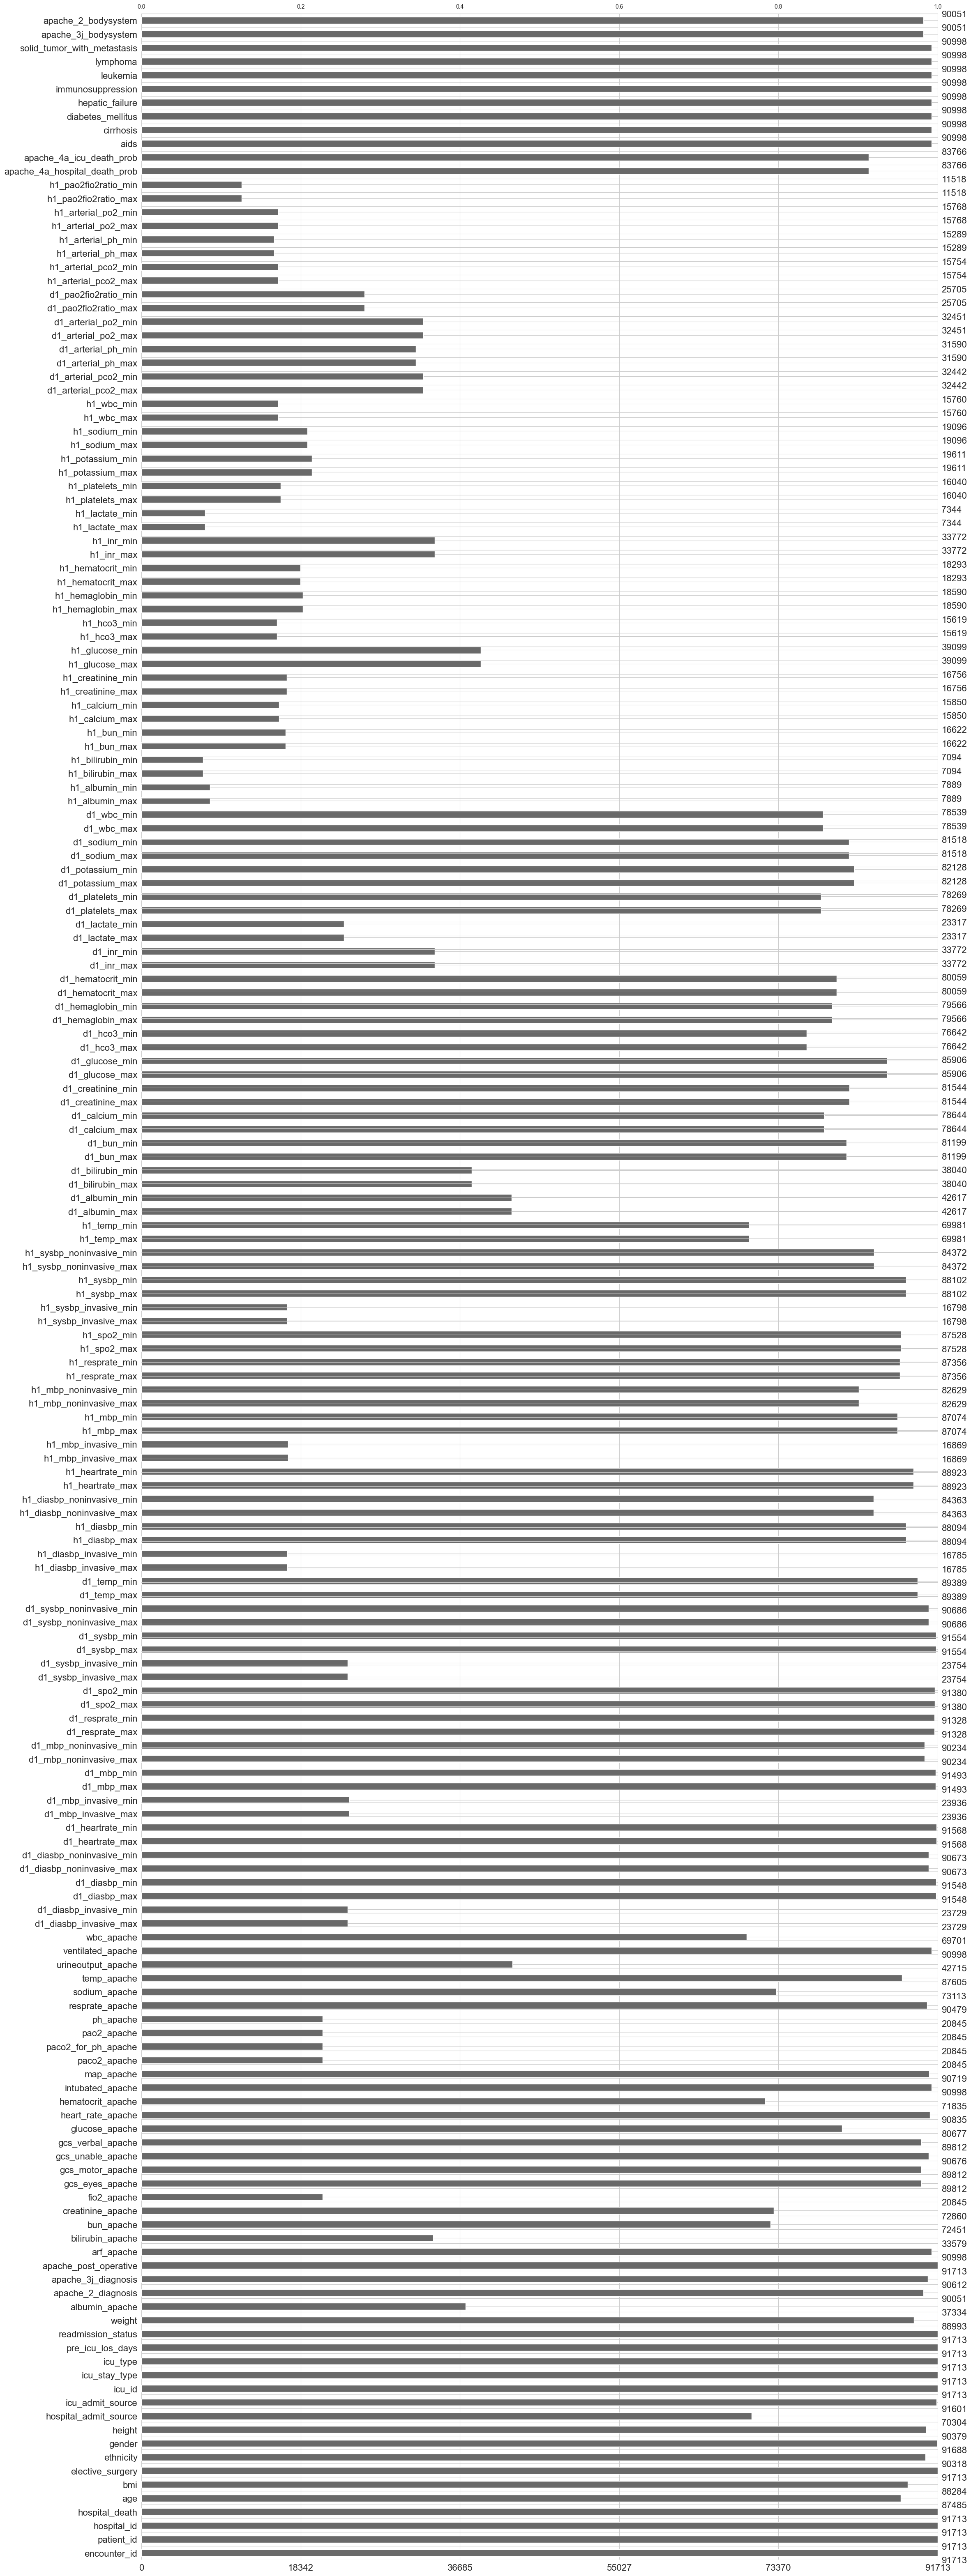

In [34]:
# visualizing the missing data 
msno.bar(df)

<AxesSubplot: >

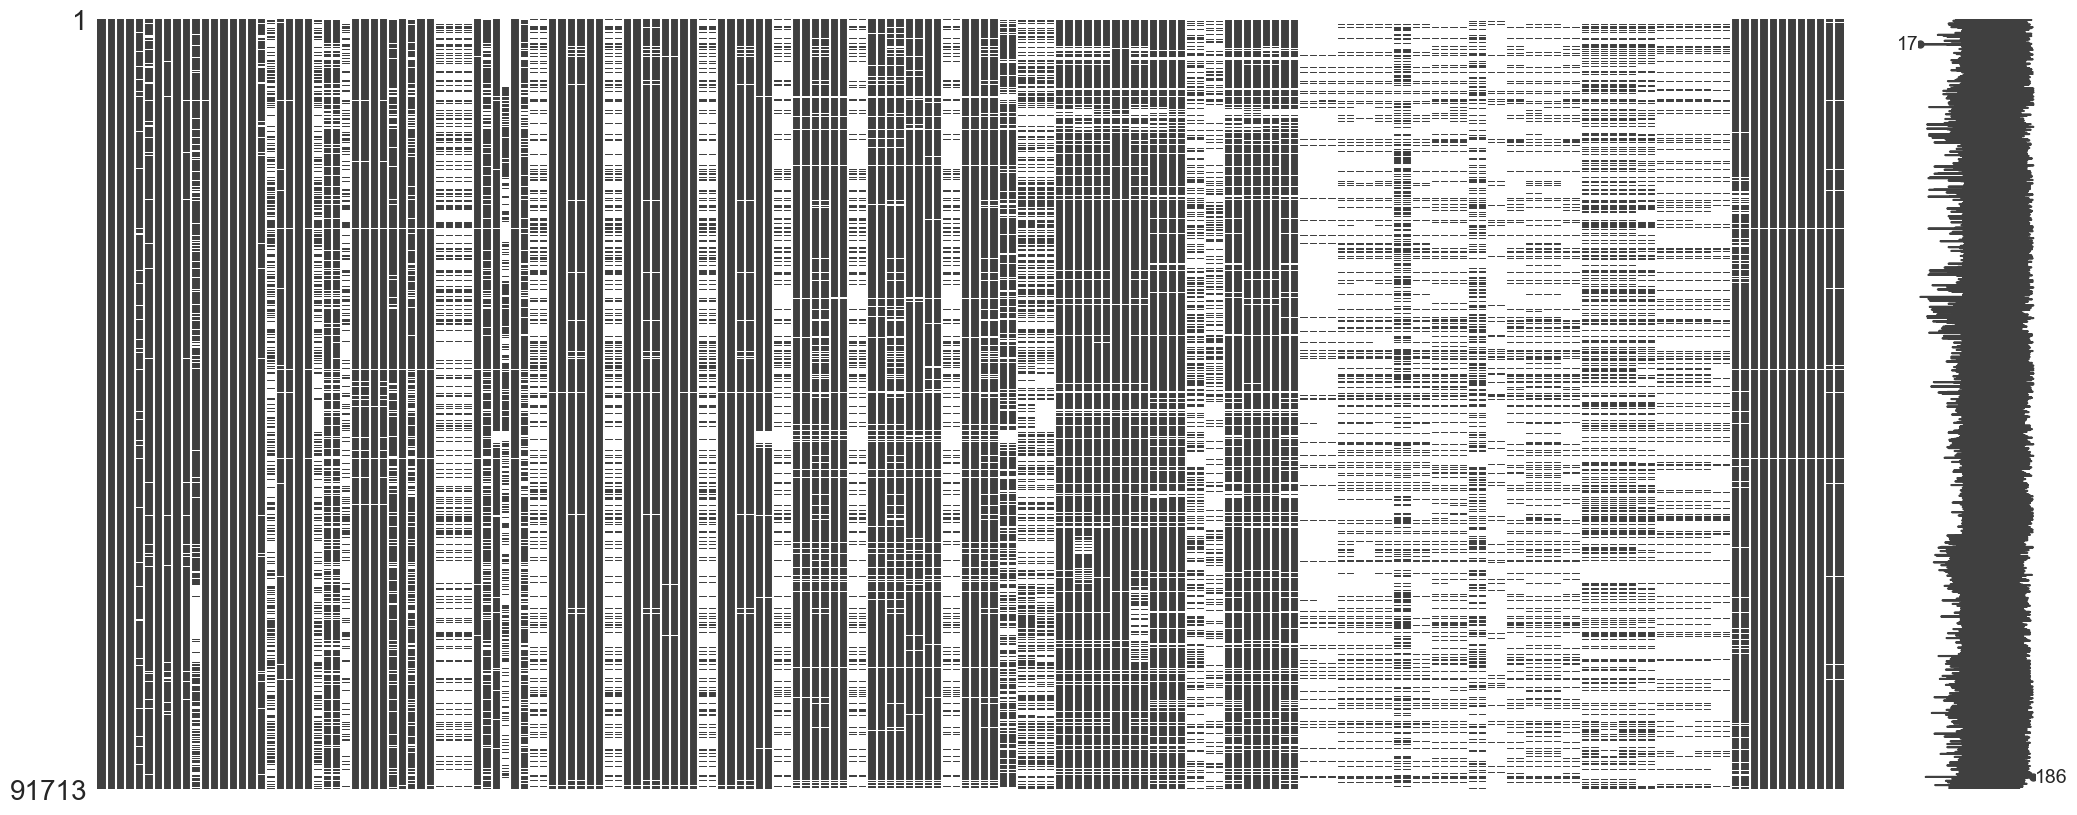

In [35]:
# we can use the matrix in the msno library to visualize where the missing data is within the columns
msno.matrix(df)

<div style="background-color: #20B2AA; padding: 20px; color: black; font-family: 'Times New Roman', serif;">
  <h4 style="margin-bottom: 20px;">Visualizations </h4>
  <ul style="list-style-type: disc; margin-left: 10px;">
    
  </ul>
</div>

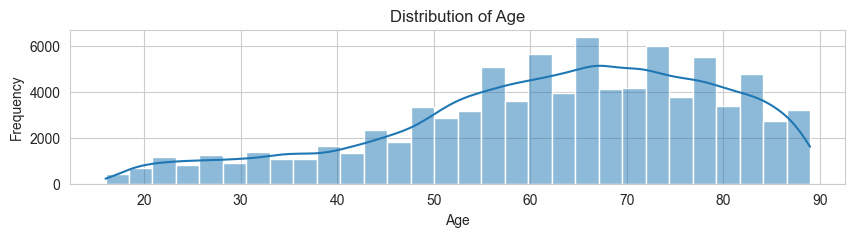

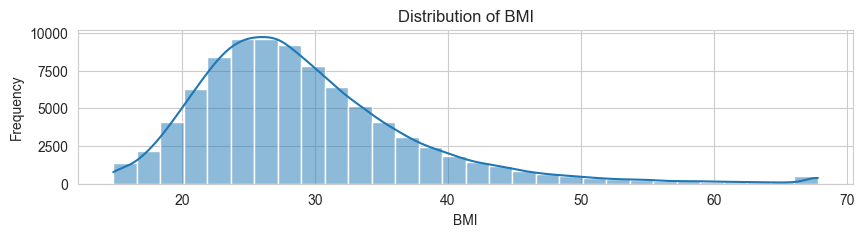

In [42]:
# Univariate Analysis
## We'll look at the distribution of 'age', 'bmi' and the target variable 'hospital_death'

### Distribution of 'age'
plt.figure(figsize=(10, 2))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of 'bmi'
plt.figure(figsize=(10, 2))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
